## Applying t-SNE on MNIST for dimensionality reduction and visualization

In [15]:
# Loading the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mnist=pd.read_csv('/Users/jayraj/Applied_AI_Course/Applied_ai_course/Datasets/digit-recognizer/mnist_train.csv')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels=mnist.label
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
data=mnist.drop('label', axis=1)

In [7]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Data preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [11]:
# Picking up the top 5000 data points for applying tSNE.
data_5000=standardized_data[0:5000,:]
labels_5000=labels[0:5000]

In [12]:
# Applying the algorithm
from sklearn.manifold import TSNE

model=TSNE(n_components=2, random_state=0)
# Configuring the parameters 
# The number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default max number of iterations for the optimization = 1000
tsne_data=model.fit_transform(data_5000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [14]:
# Creating a new dataframe which helps in plotting the result data
tsne_data=np.vstack((tsne_data.T, labels_5000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", 'Labels'))


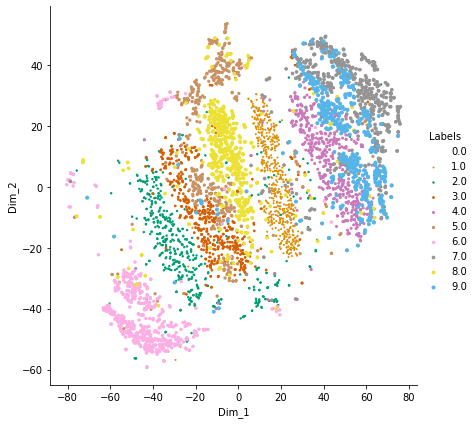

In [23]:
# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='Labels', palette="colorblind", height=6).map(plt.scatter, 'Dim_1', 'Dim_2', "Labels").add_legend()
plt.show()


## Changing the perplexity and number of iterations for checking out different results

perpelexity=50

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


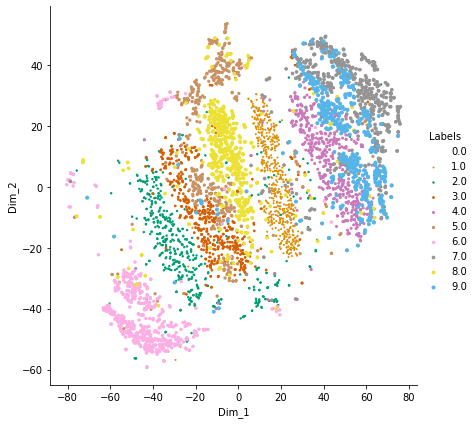

In [22]:
# Applying the algorithm
from sklearn.manifold import TSNE

model=TSNE(n_components=2, random_state=0, perplexity=50)
# Configuring the parameters 
# The number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default max number of iterations for the optimization = 1000
tsne_data=model.fit_transform(data_5000)

# Creating a new dataframe which helps in plotting the result data
tsne_data=np.vstack((tsne_data.T, labels_5000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", 'Labels'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='Labels', palette="colorblind", height=6).map(plt.scatter, 'Dim_1', 'Dim_2', "Labels").add_legend()
plt.show()

perplexity=100 and iterations= 1500

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


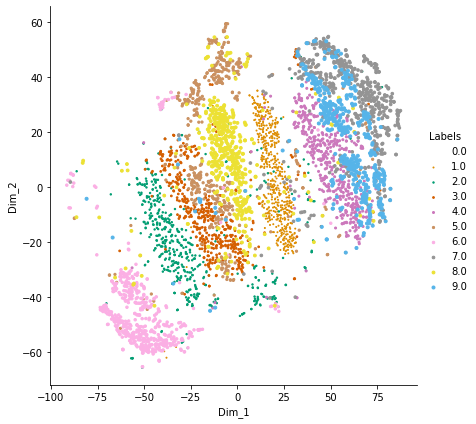

In [21]:
# Applying the algorithm
from sklearn.manifold import TSNE

model=TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1500)
# Configuring the parameters 
# The number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default max number of iterations for the optimization = 1000
tsne_data=model.fit_transform(data_5000)

# Creating a new dataframe which helps in plotting the result data
tsne_data=np.vstack((tsne_data.T, labels_5000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", 'Labels'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='Labels', palette="colorblind", height=6).map(plt.scatter, 'Dim_1', 'Dim_2', "Labels").add_legend()
plt.show()

perplexity=50 and iterations= 5000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


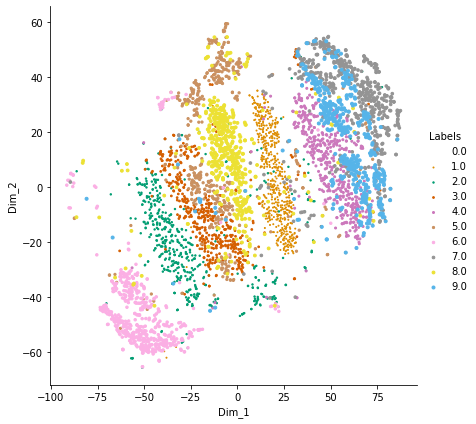

In [24]:
# Applying the algorithm
from sklearn.manifold import TSNE

model=TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1500)
# Configuring the parameters 
# The number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default max number of iterations for the optimization = 1000
tsne_data=model.fit_transform(data_5000)

# Creating a new dataframe which helps in plotting the result data
tsne_data=np.vstack((tsne_data.T, labels_5000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", 'Labels'))

# Plotting the result of tsne
sns.FacetGrid(tsne_df, hue='Labels', palette="colorblind", height=6).map(plt.scatter, 'Dim_1', 'Dim_2', "Labels").add_legend()
plt.show()